In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [4]:
real_estate=pd.read_csv('ca_real_estate.csv')
real_estate.head(3)

addressCity addressState       price statusType      statusText
0     Van Nuys           CA    $469,999   FOR_SALE  Condo for sale
1  Canoga Park           CA  $1,775,000   FOR_SALE  House for sale
2  Los Angeles           CA  $3,800,000   FOR_SALE  House for sale

In [5]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   addressCity   2000 non-null   object
 1   addressState  2000 non-null   object
 2   price         2000 non-null   object
 3   statusType    2000 non-null   object
 4   statusText    2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [6]:
real_estate.nunique()

addressCity      48
addressState      1
price           813
statusType        1
statusText        8
dtype: int64

In [7]:
real_estate_for_sale_in_ca=real_estate.drop(['addressState','statusType'], axis=1)

In [8]:
real_estate_for_sale_in_ca.head(3)

addressCity       price      statusText
0     Van Nuys    $469,999  Condo for sale
1  Canoga Park  $1,775,000  House for sale
2  Los Angeles  $3,800,000  House for sale

In [9]:
real_estate_for_sale_in_ca['statusText'].unique()

array(['Condo for sale', 'House for sale', 'Multi-family home for sale',
       'New construction', 'Townhouse for sale', 'Home for sale',
       'Foreclosure', 'Auction'], dtype=object)

In [17]:
real_estate_for_sale_in_ca['price']=real_estate_for_sale_in_ca['price'].str.replace('$','')
real_estate_for_sale_in_ca['price']=real_estate_for_sale_in_ca['price'].str.replace(',','')

In [18]:
real_estate_for_sale_in_ca.head(3)

addressCity    price      statusText
0     Van Nuys   469999  Condo for sale
1  Canoga Park  1775000  House for sale
2  Los Angeles  3800000  House for sale

In [29]:
real_estate_for_sale_in_ca=real_estate_for_sale_in_ca[real_estate_for_sale_in_ca['price']!='55.0M']
real_estate_for_sale_in_ca['price']=real_estate_for_sale_in_ca['price'].str.replace('+','')
real_estate_for_sale_in_ca['price']=real_estate_for_sale_in_ca['price'].str.replace('K','000')

In [31]:
real_estate_for_sale_in_ca['price']=real_estate_for_sale_in_ca['price'].astype('float')

In [32]:
real_estate_for_sale_in_ca.head(3)

addressCity      price      statusText
0     Van Nuys   469999.0  Condo for sale
1  Canoga Park  1775000.0  House for sale
2  Los Angeles  3800000.0  House for sale

<Axes: xlabel='addressCity', ylabel='price'>

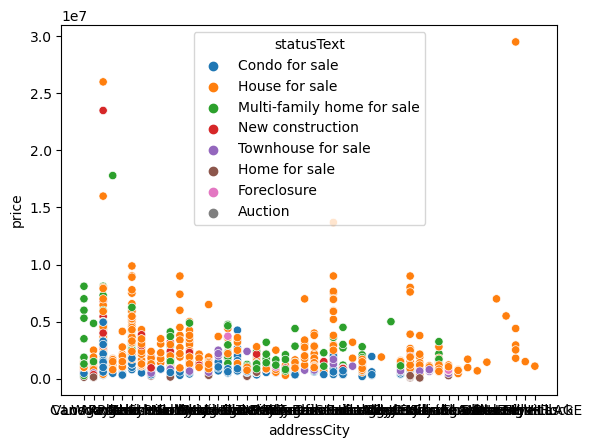

In [33]:
sns.scatterplot(
    data=real_estate_for_sale_in_ca,
    x='addressCity',
    y='price',
    hue='statusText'
)

In [34]:
real_estate_for_sale_in_ca.nunique()

addressCity     48
price          808
statusText       8
dtype: int64

<Axes: xlabel='addressCity', ylabel='Count'>

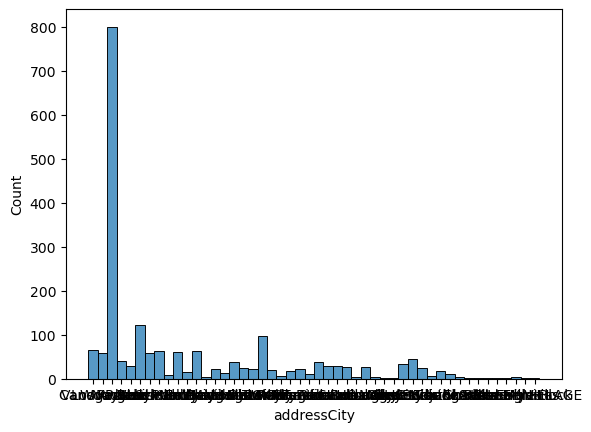

In [35]:
sns.histplot(
    data=real_estate_for_sale_in_ca,
    x='addressCity',
)

In [38]:
top_3_city=real_estate_for_sale_in_ca['addressCity'].value_counts().head(3)

In [45]:
top3_city_df=real_estate_for_sale_in_ca[real_estate_for_sale_in_ca['addressCity'].isin(top_3_city.index)]

In [46]:
top3_city_df

addressCity       price                  statusText
2     Los Angeles   3800000.0              House for sale
4     Los Angeles    799000.0              House for sale
5     Los Angeles    665000.0              House for sale
6     Los Angeles   1350000.0  Multi-family home for sale
7     Los Angeles   2999999.0              House for sale
...           ...         ...                         ...
1991  Los Angeles  23495000.0            New construction
1992  Los Angeles   1275000.0              Condo for sale
1993  Los Angeles   1595000.0              Condo for sale
1995  Los Angeles   1449999.0              Condo for sale
1997  Los Angeles    989000.0              Condo for sale

[1019 rows x 3 columns]

<Axes: xlabel='addressCity', ylabel='Count'>

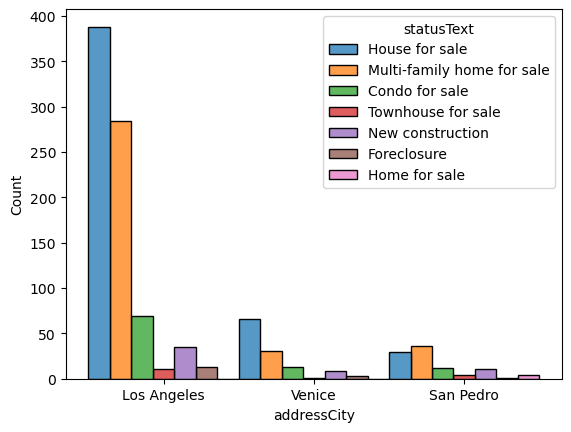

In [48]:
sns.histplot(
    data=top3_city_df,
    x='addressCity',
    hue='statusText',
    multiple='dodge'
)